In [1]:
import sys  
sys.path.insert(0, '..')
from AT_funs import *

In [2]:
filename = 'BST.MI.xlsx'
df = read_xlsx(filename)
ticker = filename.replace('xlsx', '')

filename_bm = 'FTSEMIB.MI.xlsx'
bm_df = read_xlsx(filename_bm)
bm_name = filename_bm.replace('xlsx', '')

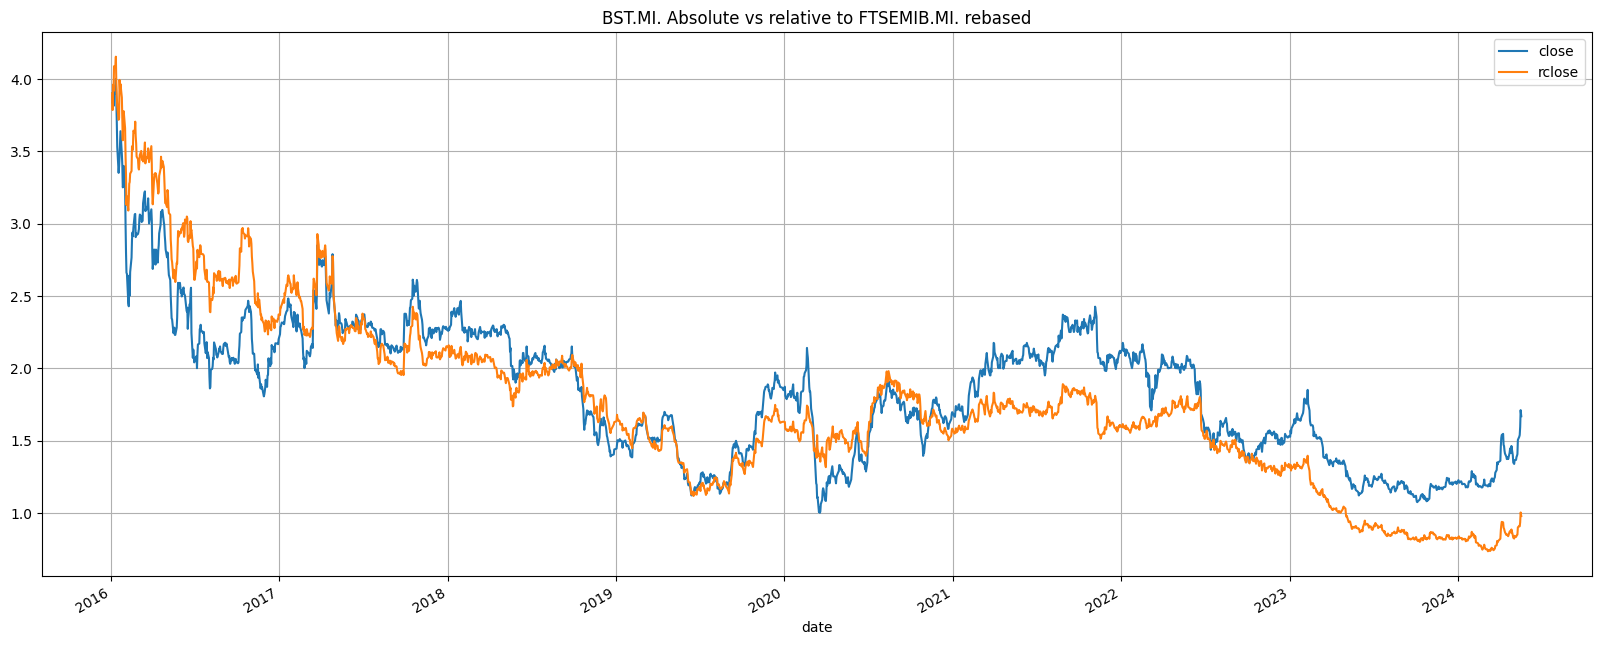

In [3]:
plot_abs_rel(df, ticker, bm_df, bm_name)

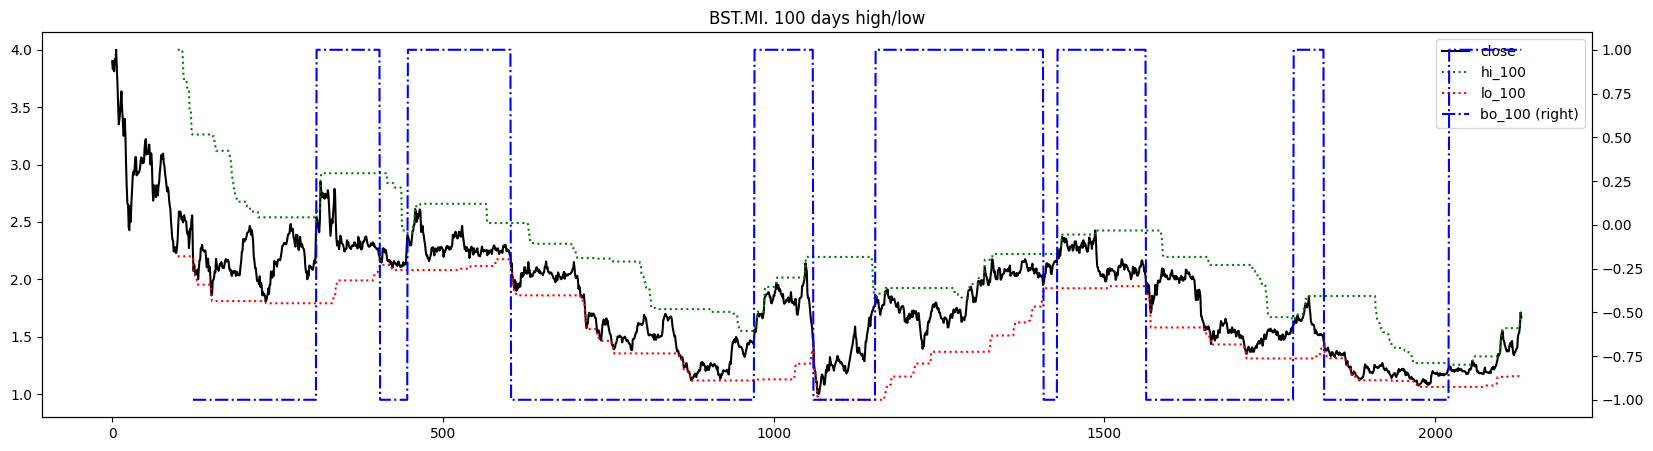

In [4]:
window_bo = 100
df_bo = df.copy()
df_bo = signal_bo(df_bo, window_bo)
bo_signal = 'bo_' + str(window_bo)
plot_signal_bo(df_bo, window_bo, ticker)

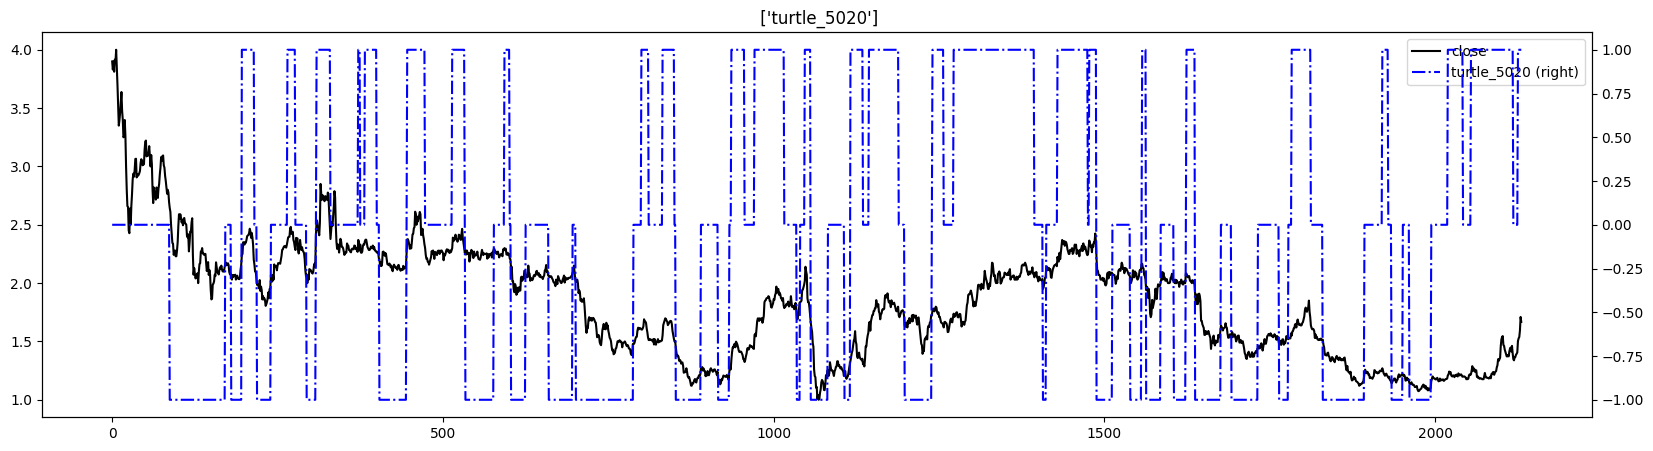

In [5]:
fast = 20
slow = 50
df_tt = df.copy()
df_tt = signal_tt(df_tt, fast = fast, slow = slow)
tt_signal = 'turtle_' + str(slow) + str(fast)
plot_signal_tt(df_tt, fast, slow)

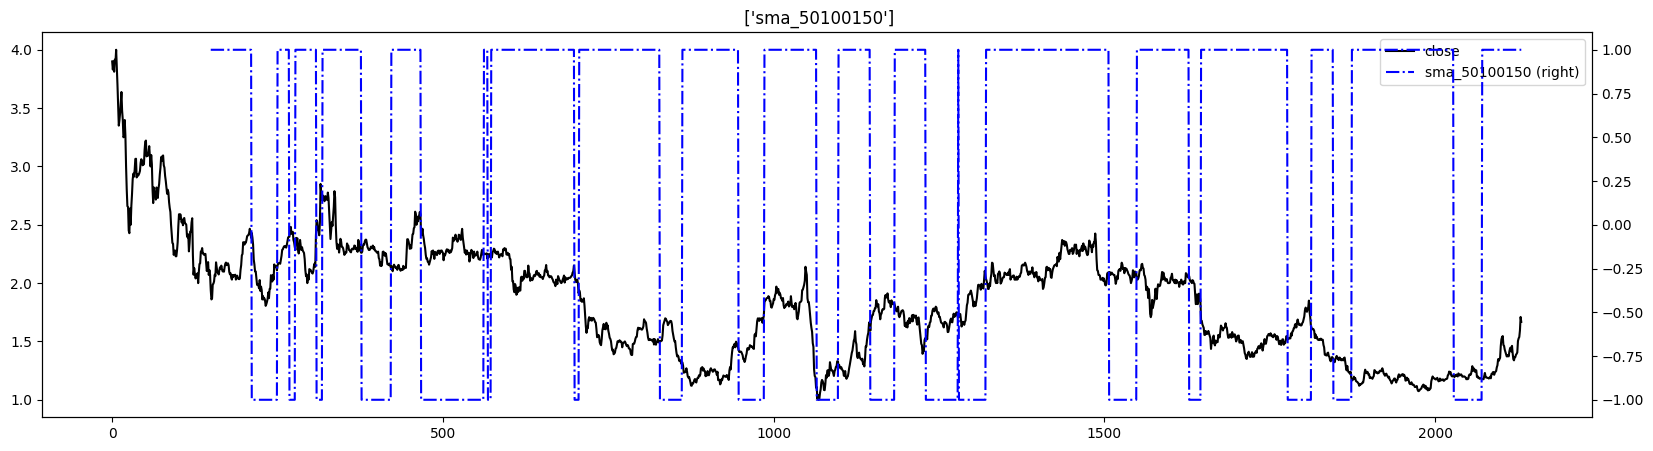

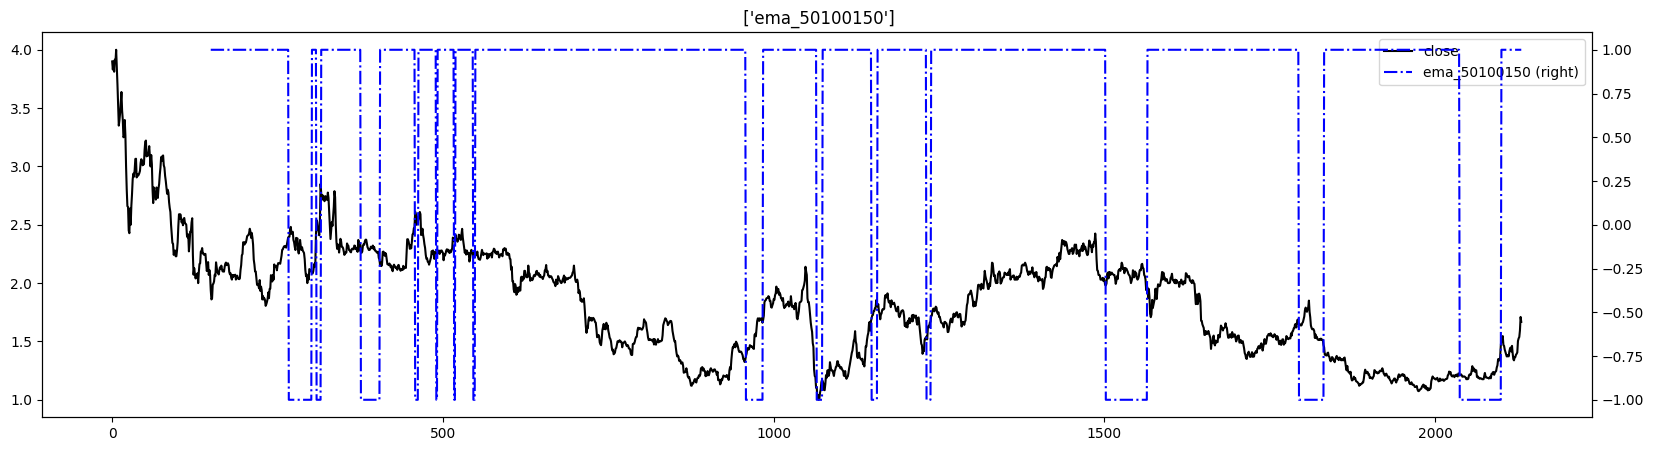

In [6]:
st = 50
mt = 100
lt = 150
df_ma = df.copy()
df_ma = signal_sma(df_ma, st, mt, lt)
df_ma = signal_ema(df_ma, st, mt, lt)

sma_signal = 'sma_' + str(st) + str(mt) + str(lt)
ema_signal = 'ema_' + str(st) + str(mt) + str(lt)

plot_signal_ma(df_ma, st, mt, lt)

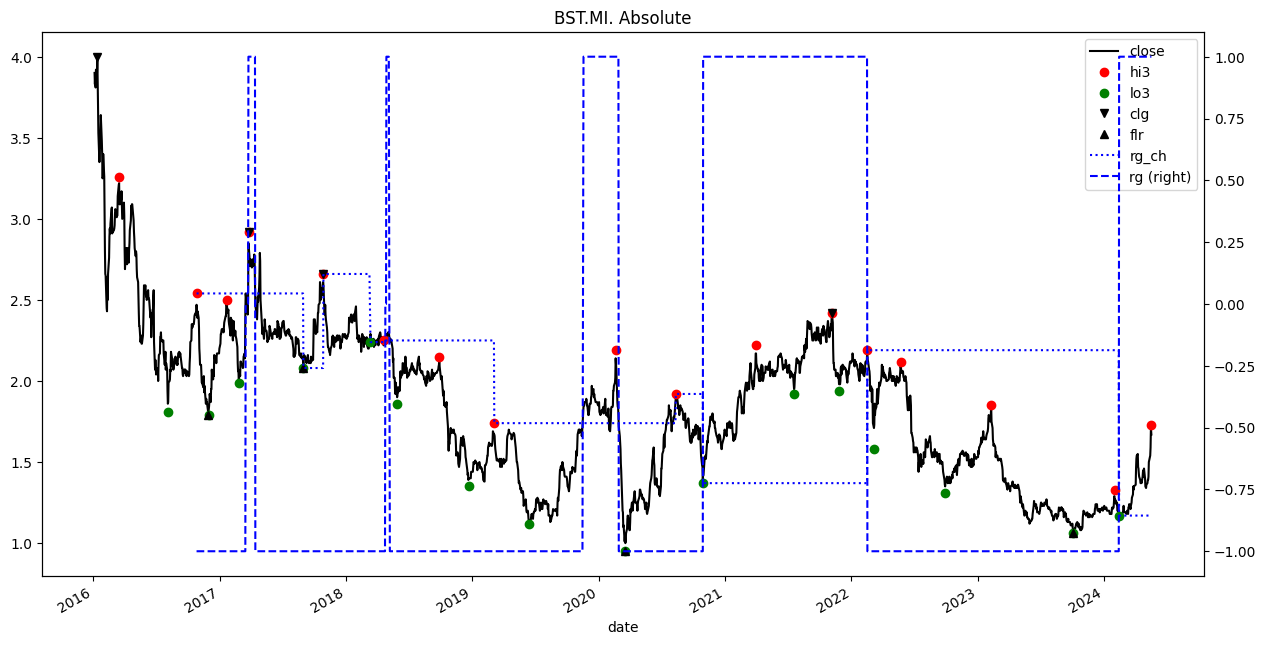

In [7]:
df_fc = df.copy()
df_fc = detect_regime(df_fc, bm_df)
fc_signal = 'rg'
fcr_signal = 'rrg'
plot_signal_abs(df_fc, ticker)

1
1


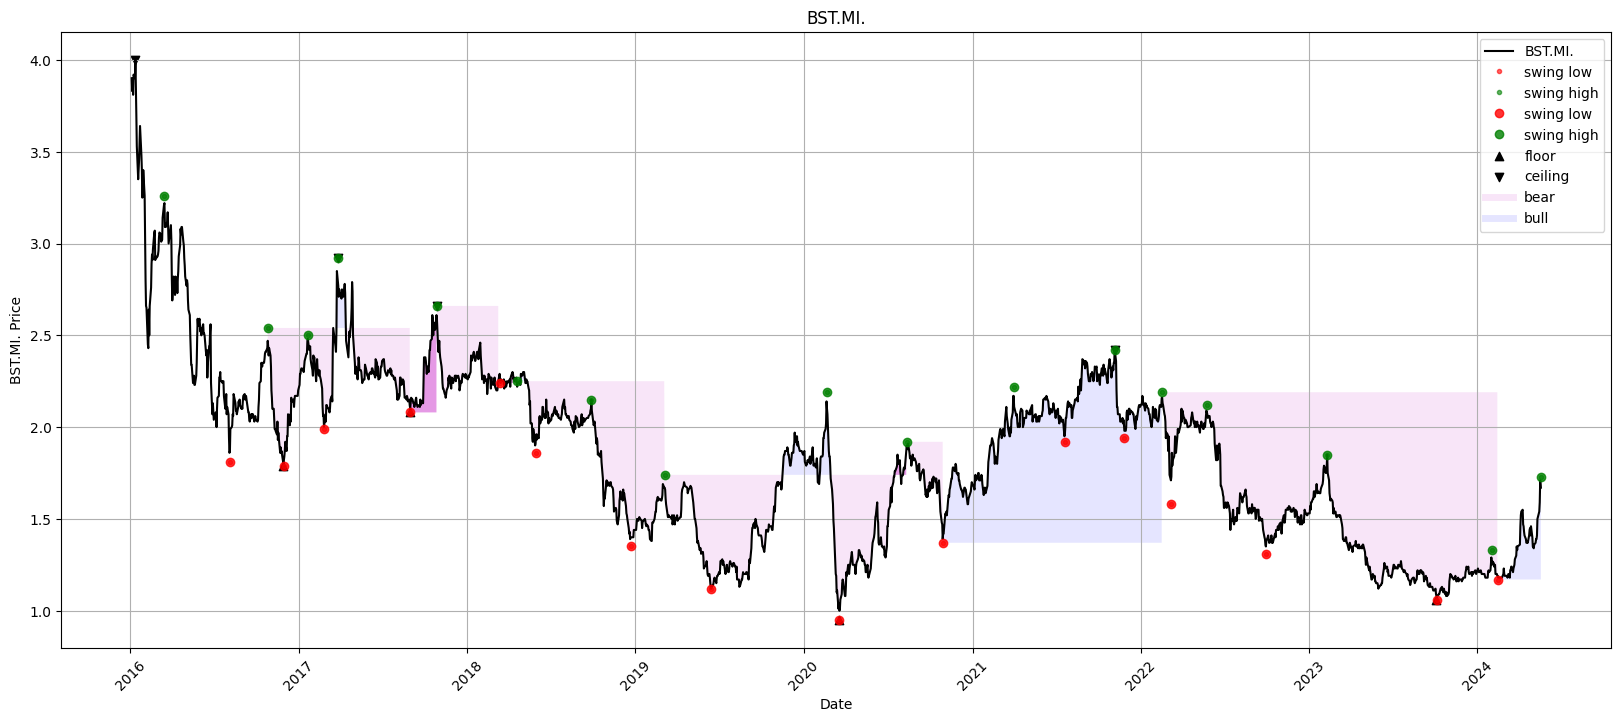

In [8]:
plot_regime_abs(df_fc, ticker)

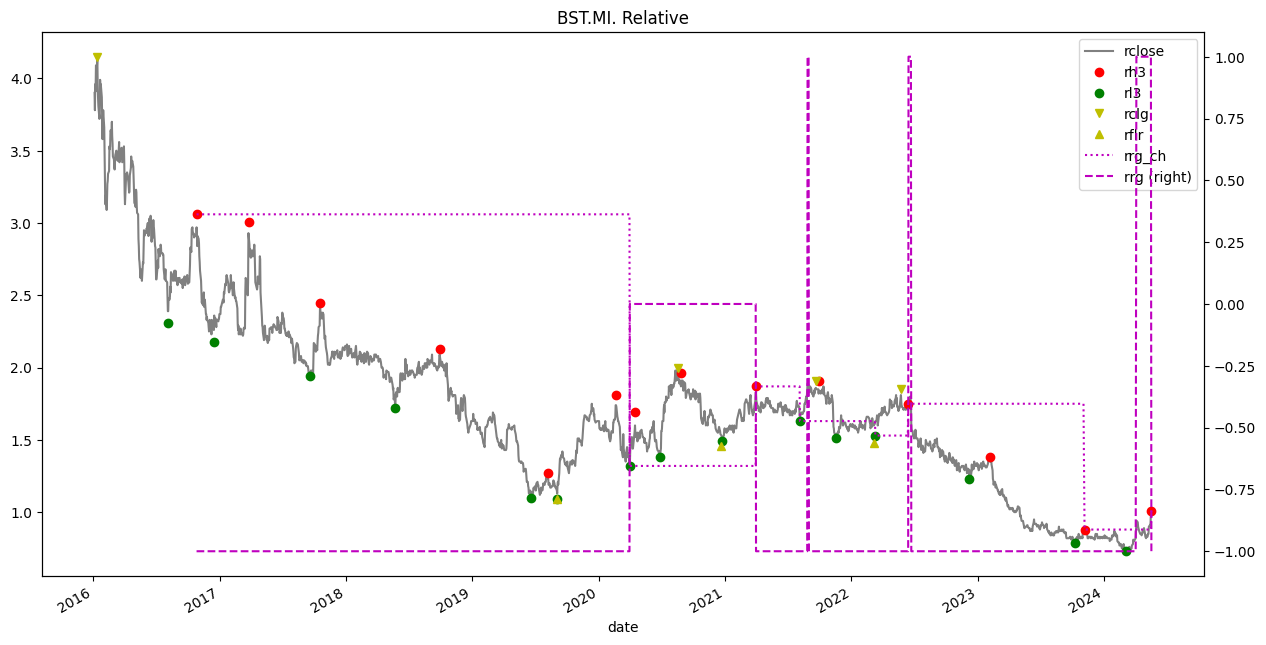

In [9]:
plot_signal_rel(df_fc, ticker)

1
1


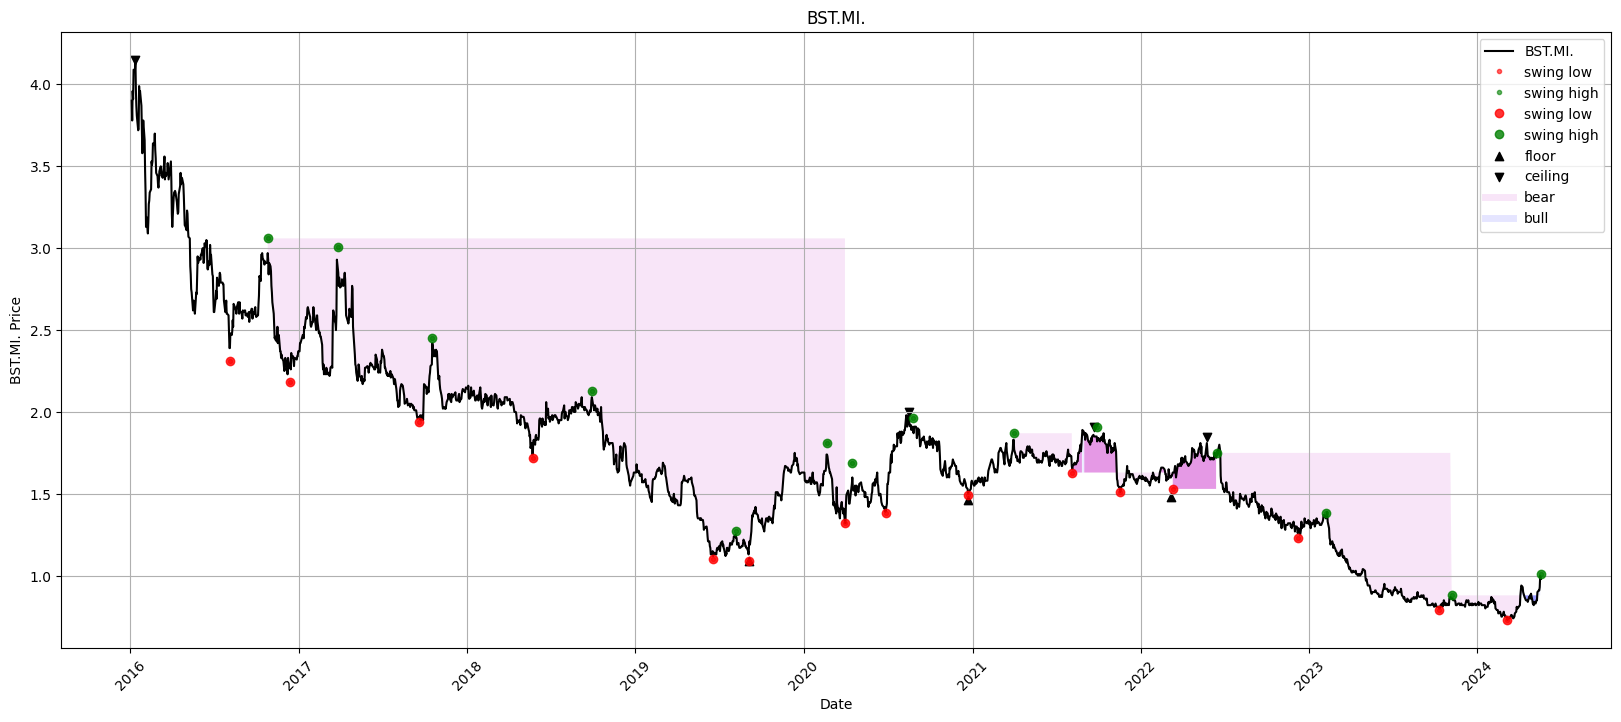

In [10]:
plot_regime_rel(df_fc, ticker)

In [11]:
method = ['breakout', 'turtle', 'sma', 'ema', 'floor_ceiling', 'floor_ceiling_relative']
signal = [bo_signal, tt_signal, sma_signal, ema_signal, fc_signal, fcr_signal]
df_signal = [df_bo, df_tt, df_ma, df_ma, df_fc, df_fc]

# method = ['turtle']
# signal = [tt_signal]
# df_signal = [df_tt]

In [12]:
def get_df_signal(df_signal, signal, window_exp):
    df_signal = df_signal.copy()
    df_signal = get_returns(df_signal, signal)
    df_signal = get_expectancies(df_signal, window_exp)
    return df_signal
    

In [13]:
window_exp = 100  # set the value of window_exp  
output_signals = []  # create an empty list to hold the output dataframes  
  
for i in range(len(signal)):  
    df = df_signal[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_df_signal(df, s, window_exp)  # call the function on the ith dataframe and signal  
    output_df['method'] = str(m)  # create a new column in output_df with the signal name  
    output_signals.append(output_df)  # append the output dataframe to the list  
  
# output_signals now contains the processed dataframes with the signal column added  


In [14]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'close', 'stop_loss','tt_cumul']]
output_df_sel.groupby('method').last() 

close  stop_loss  tt_cumul
method                                            
breakout                1.668      1.336 -0.106067
ema                     1.668      1.336 -0.625350
floor_ceiling           1.670      1.340  3.833536
floor_ceiling_relative  1.670      1.730  1.846422
sma                     1.668      1.336 -0.261220
turtle                  1.668      1.336  0.047345

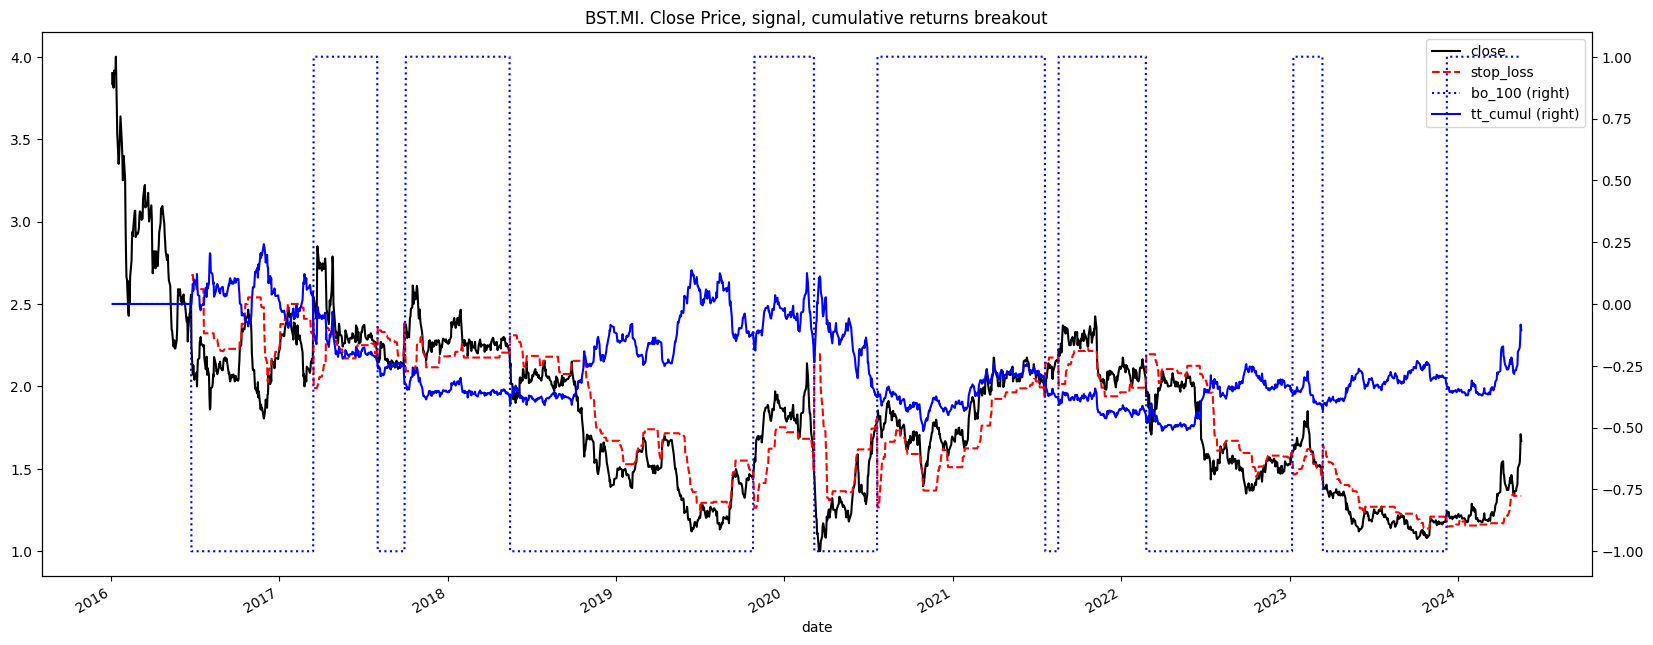

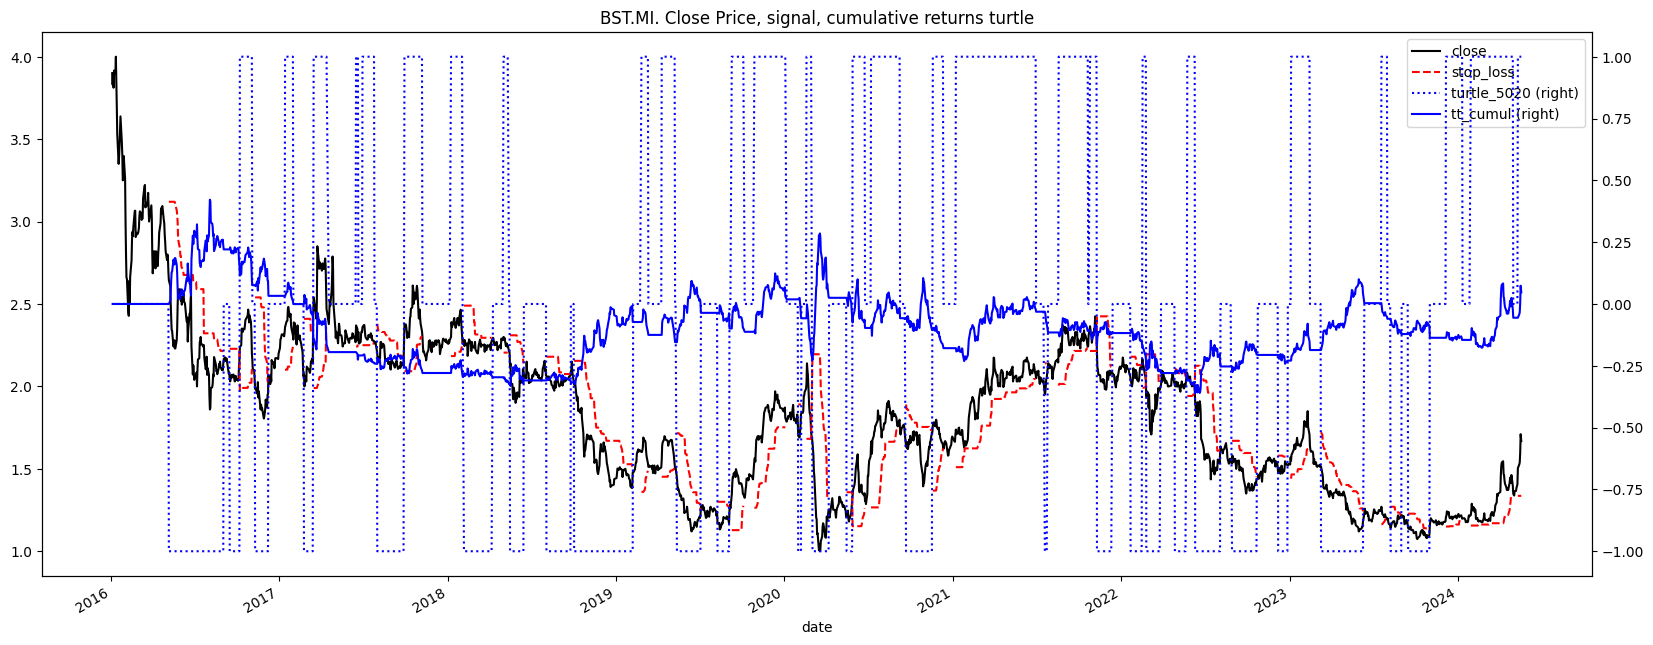

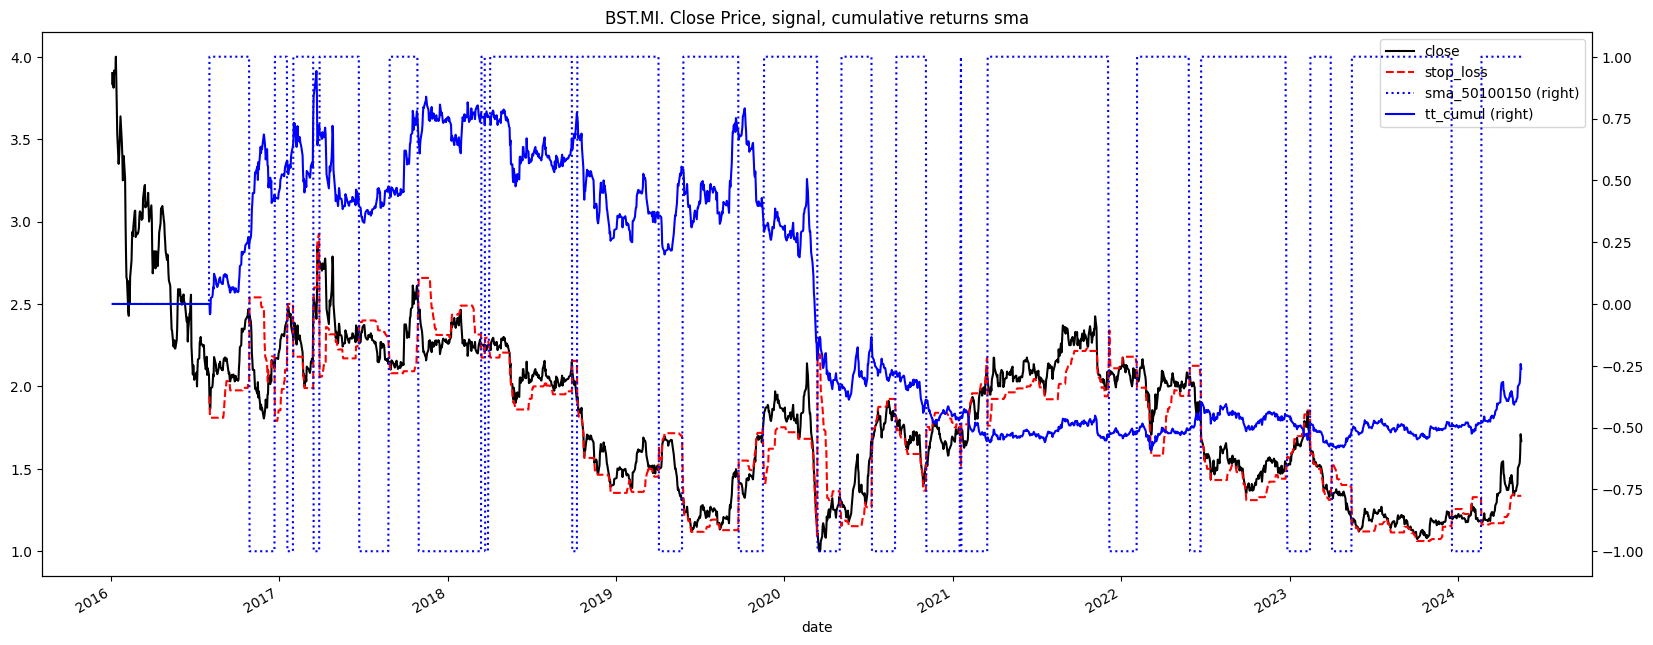

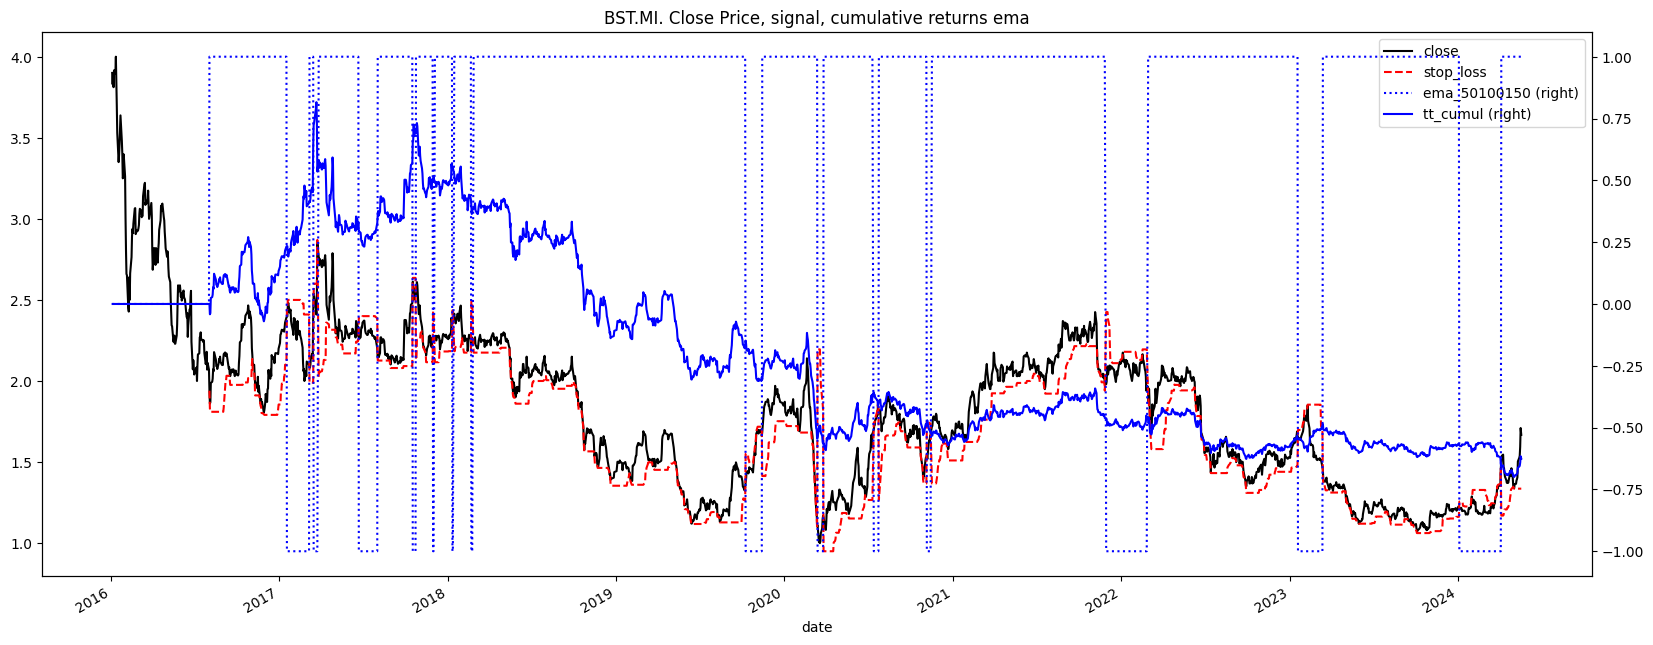

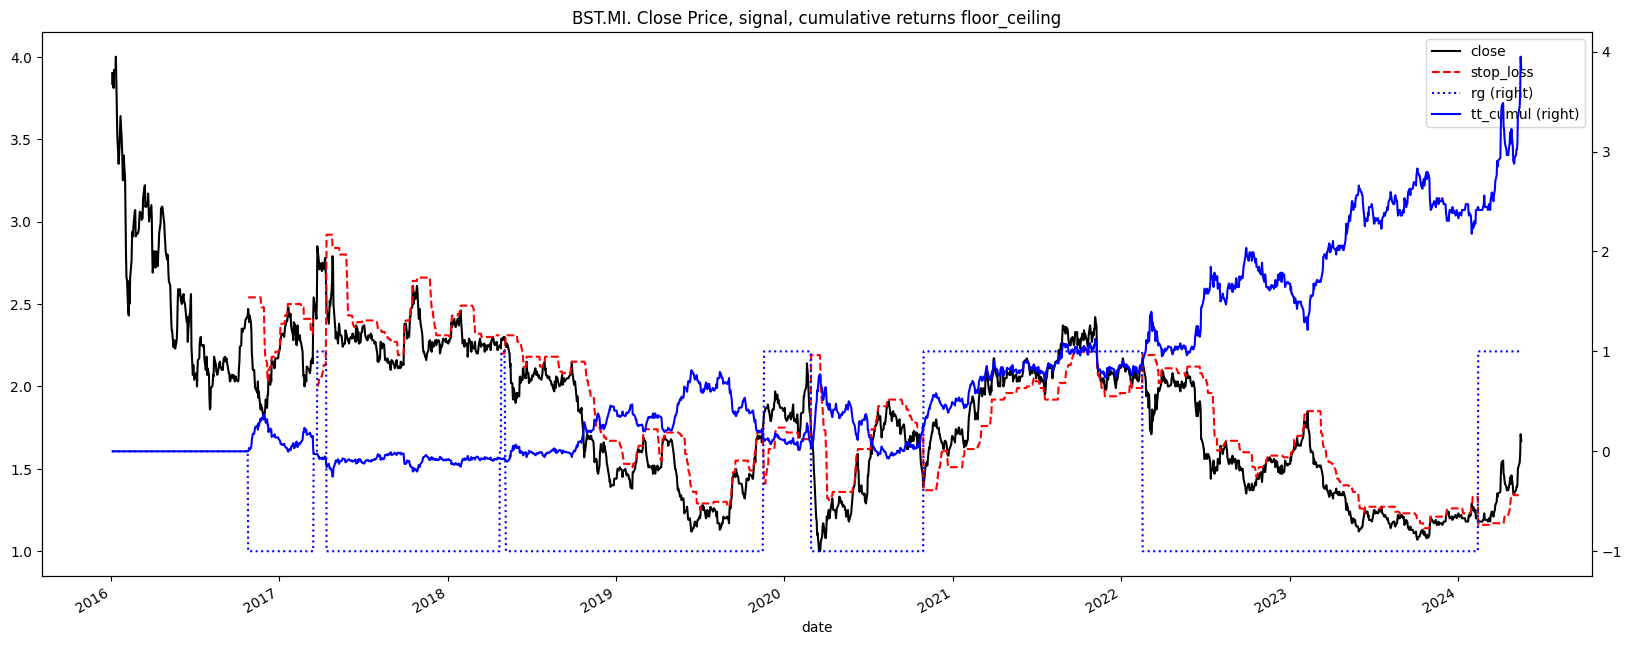

In [15]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_price_signal_cumreturns(df, ticker, s, m)

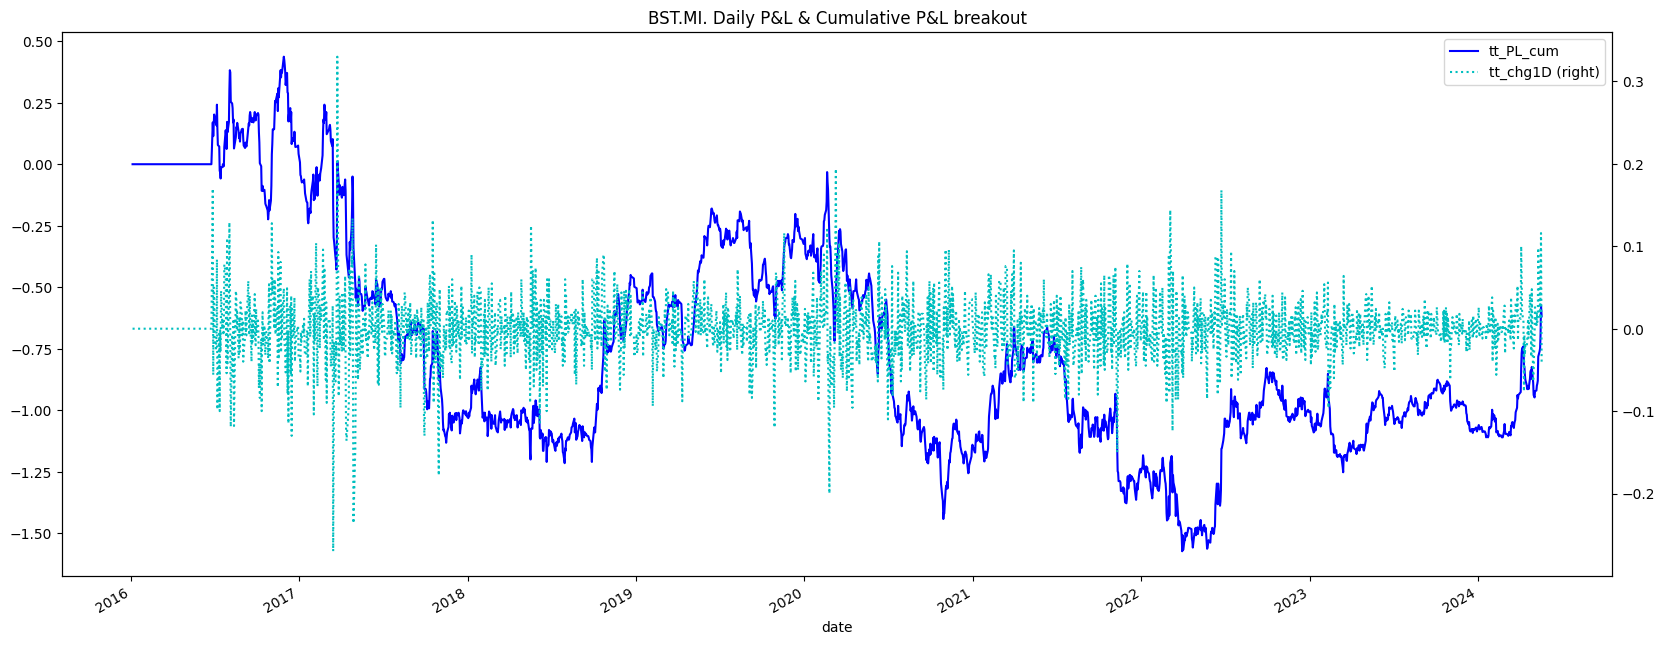

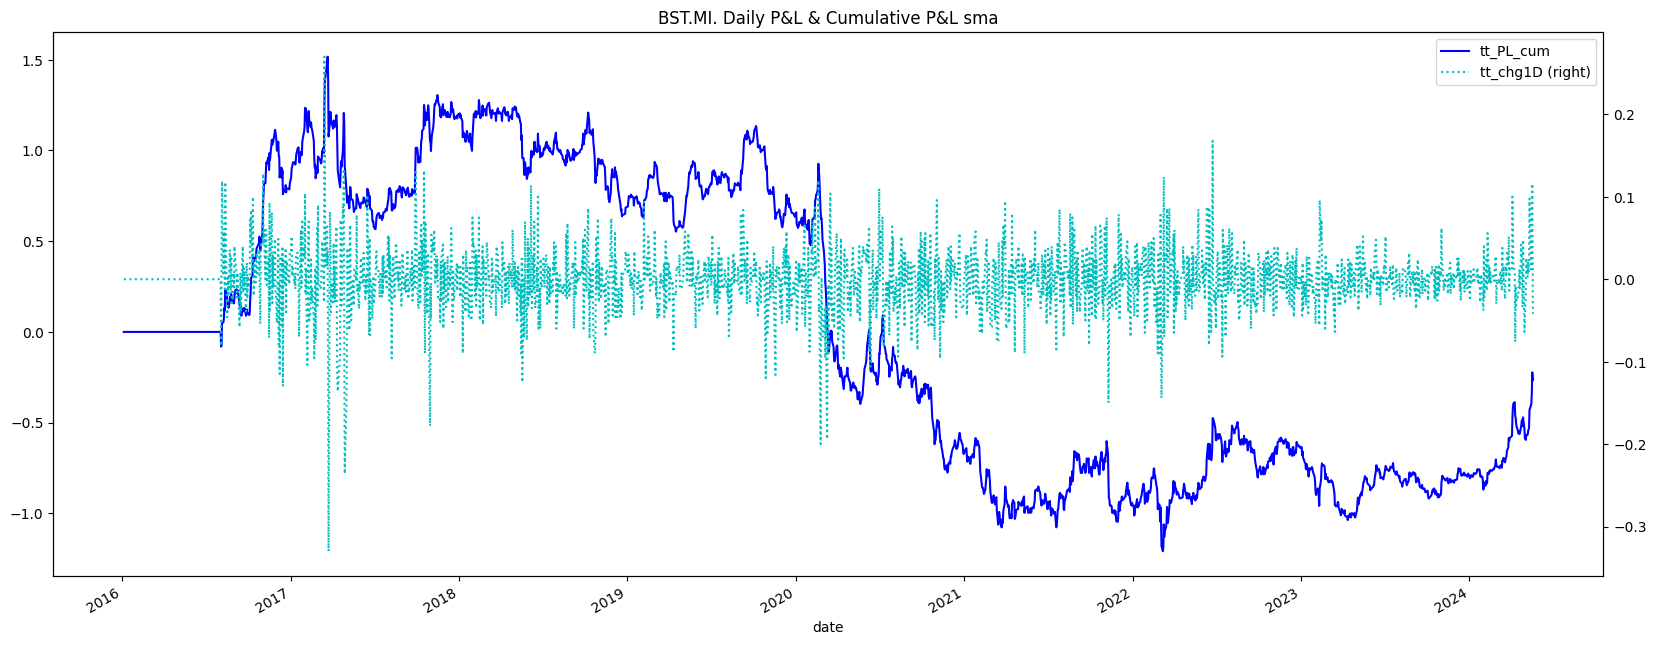

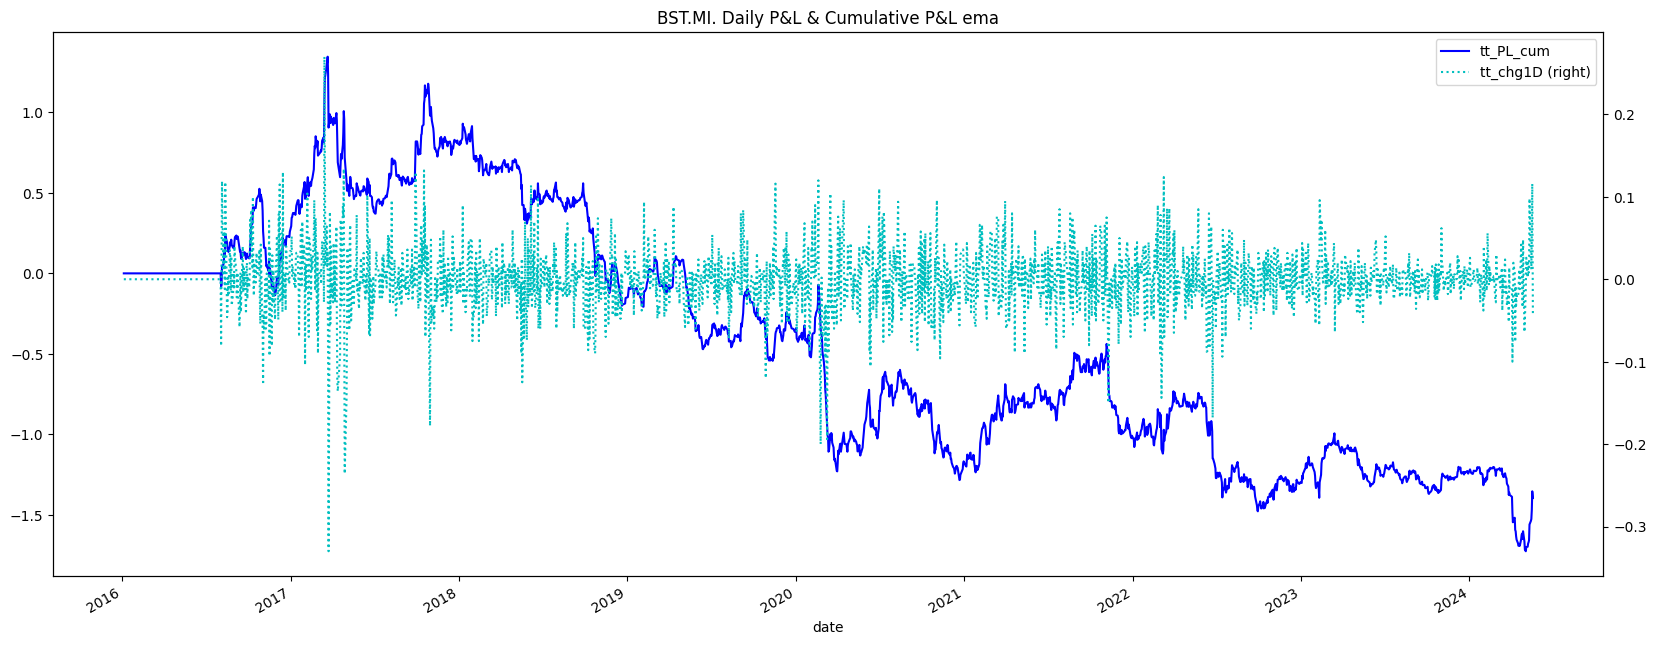

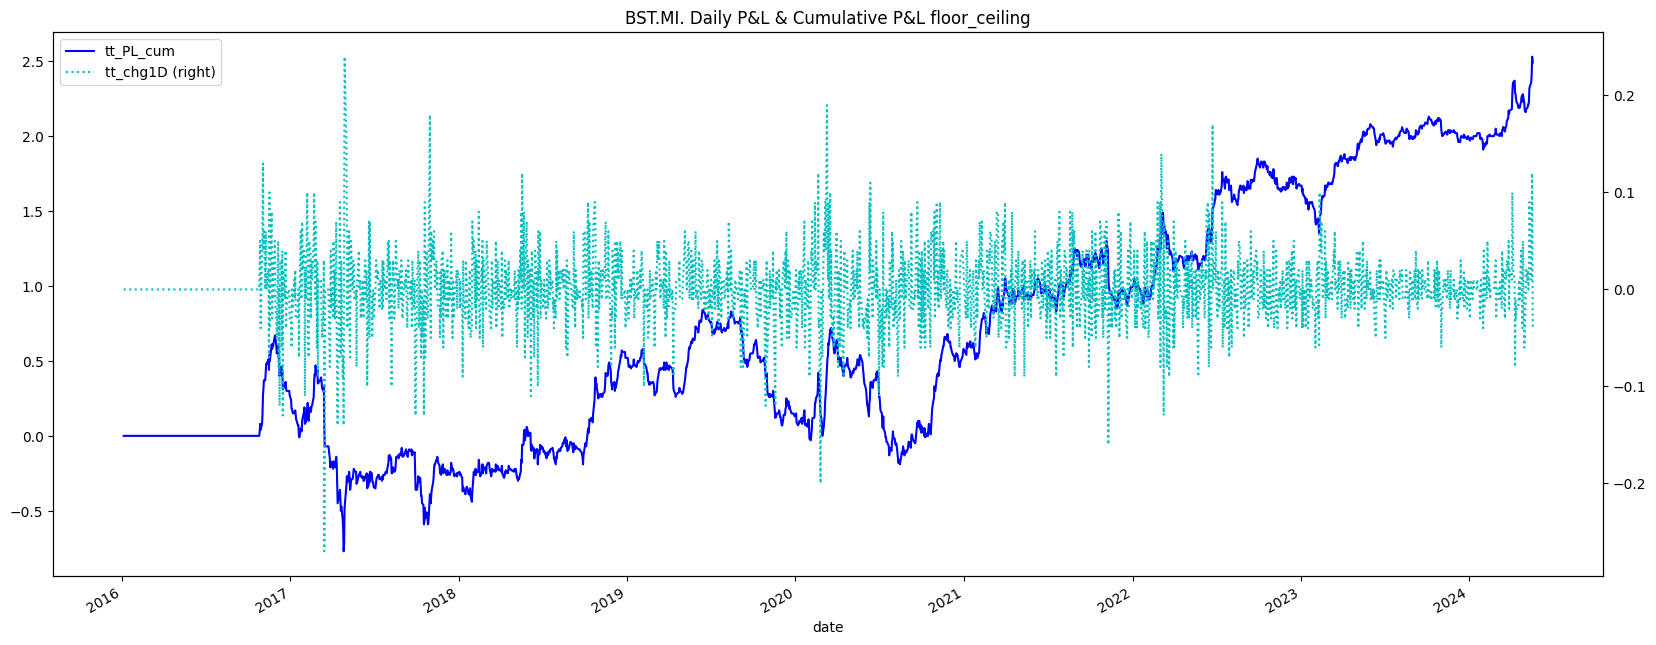

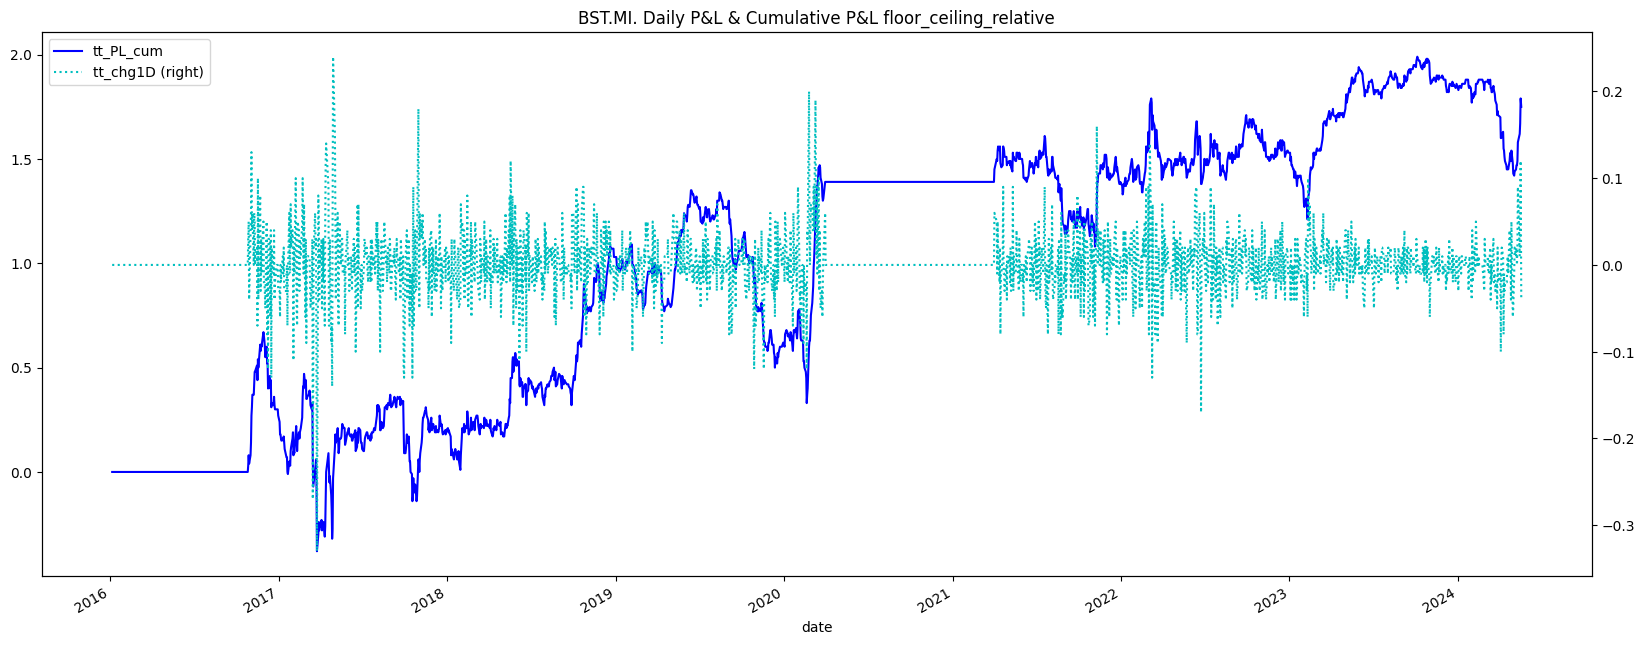

In [16]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_PL(df, ticker, m)

In [17]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'trading_edge','geometric_expectancy','kelly']]
output_df_sel.groupby('method').last() 

trading_edge  geometric_expectancy      kelly
method                                                               
breakout                    0.002760              0.002735  55.702225
ema                        -0.000679             -0.000705 -13.146427
floor_ceiling               0.004813              0.004792  98.071021
floor_ceiling_relative      0.001358              0.001335  27.636442
sma                         0.003623              0.003598  74.609977
turtle                      0.002704              0.002686  71.977145

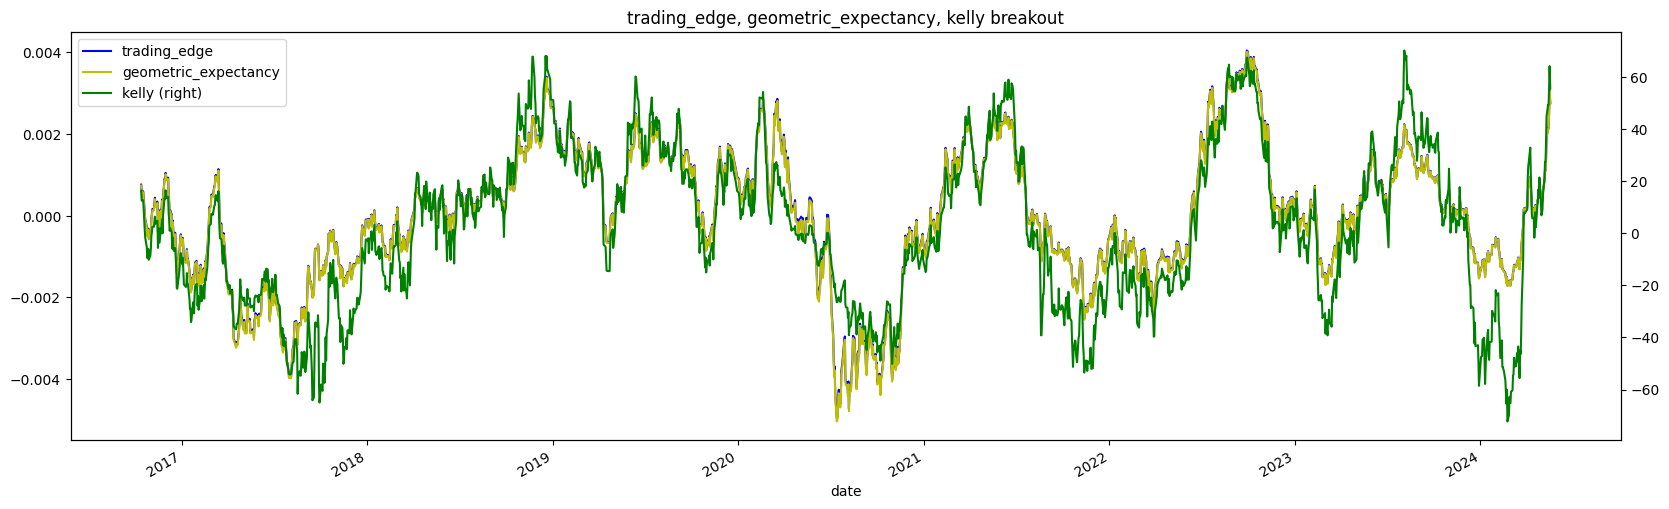

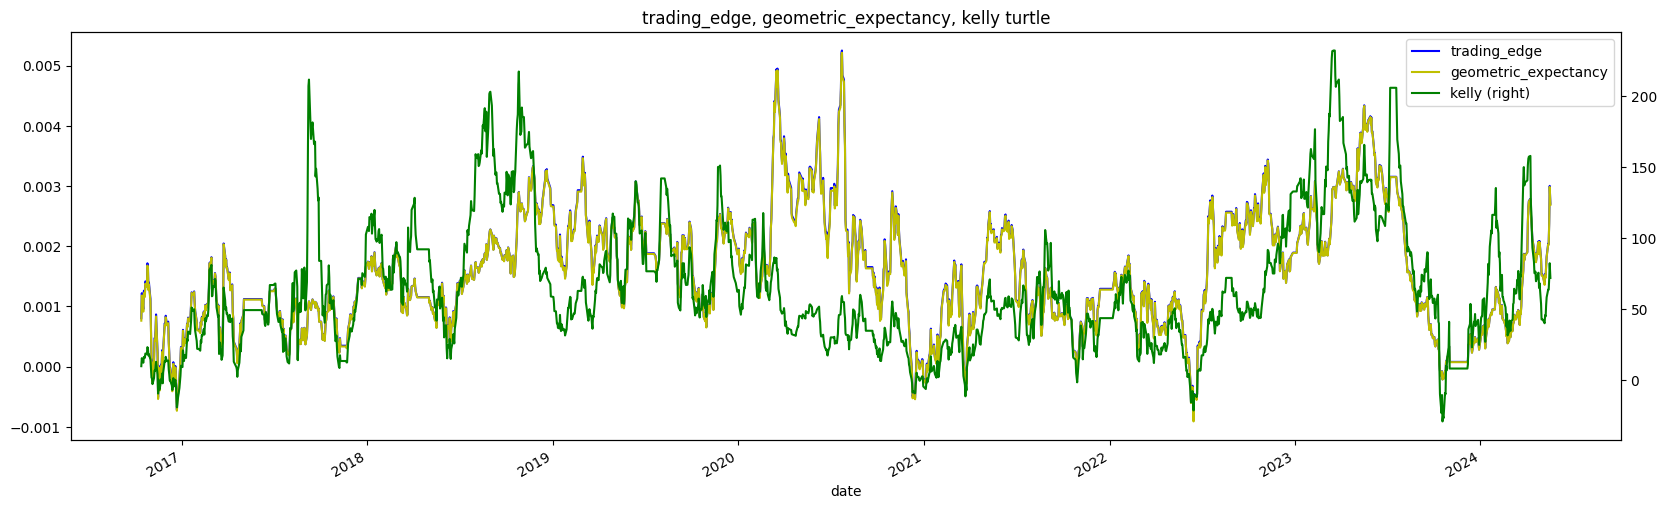

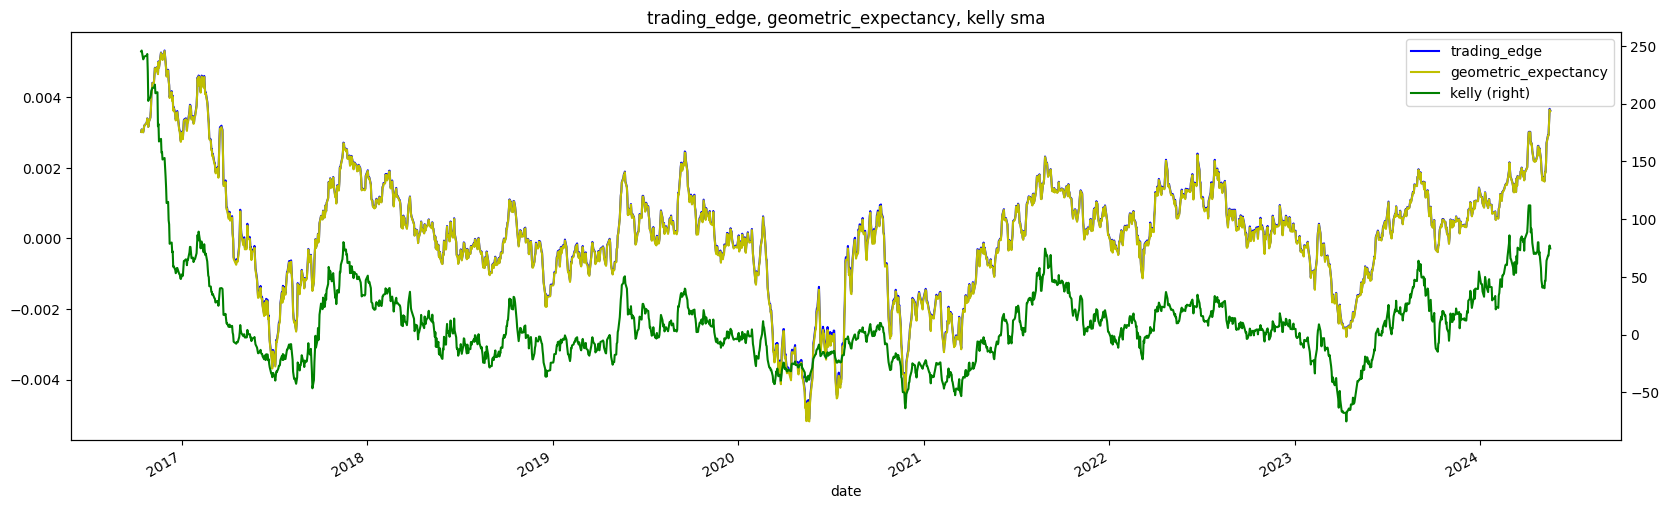

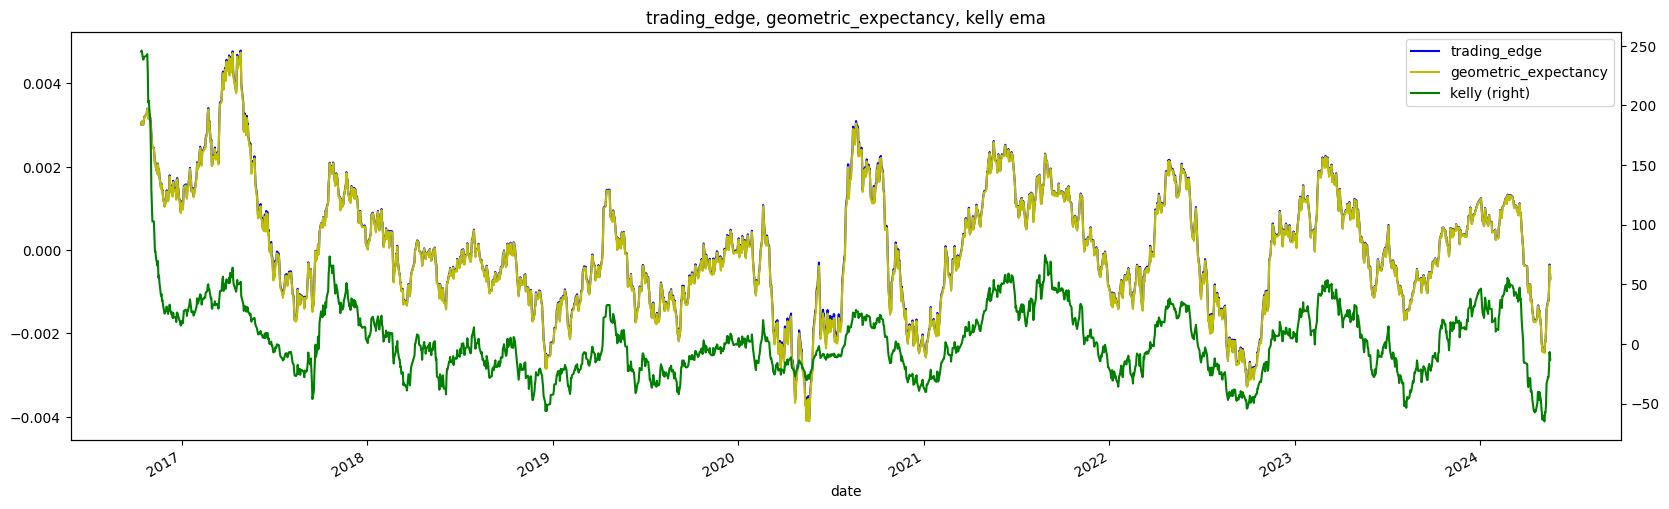

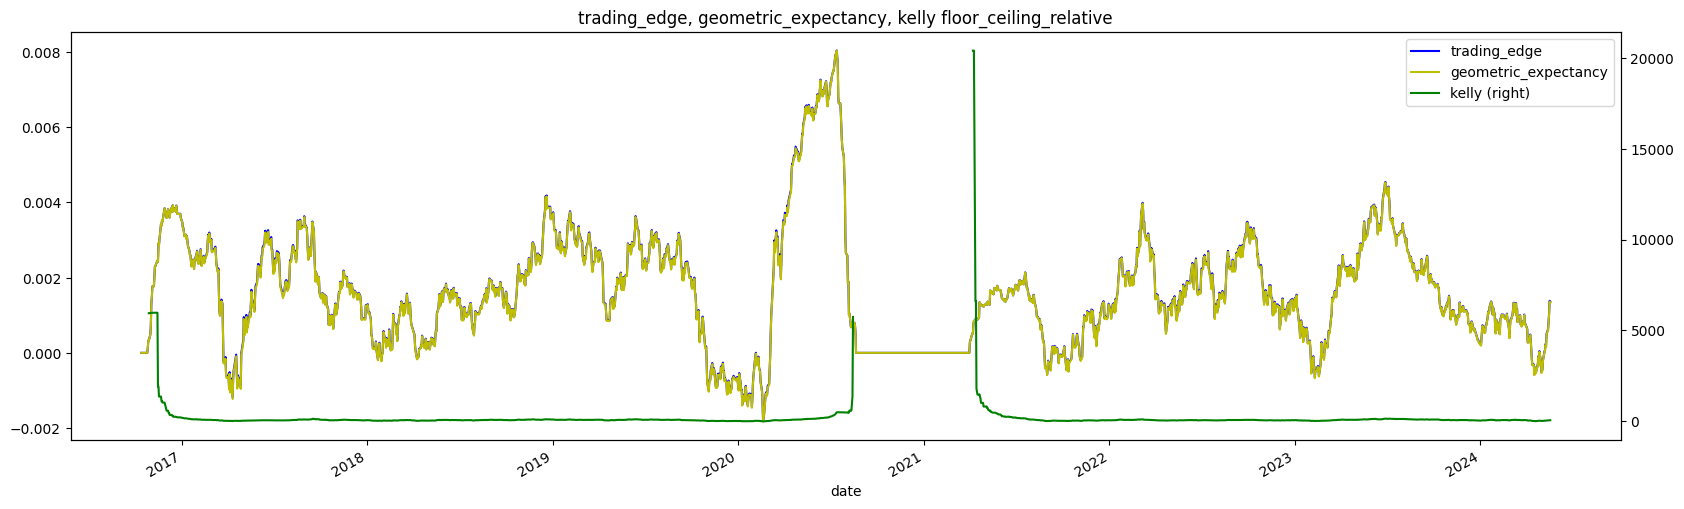

In [18]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_expectancies(df, window_exp, m)

In [19]:
starting_capital = 100000
lot = 100
mn = -0.0025
mx = -0.0075
# avg = (mn + mx) / 2
tolerance= -0.1
equal_weight = 0.05
span= 5
fx = 1

In [20]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_equity_risk(df, tolerance, mn, mx, span)  # call the function on the ith dataframe and signal  
    output_signals.append(output_df)  # append the output dataframe to the list  


In [21]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_shares(df, starting_capital, lot, mn, mx, tolerance, equal_weight, span, fx, s)
    output_signals.append(output_df)  # append the output dataframe to the list  


In [22]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'constant','concave','convex','equal_weight', 'tt_PL_cum_fx']]
output_df_sel.groupby('method').last() 

constant        concave         convex  \
method                                                                
breakout                100741.598892  101112.398338  101112.398338   
ema                    -597500.109673 -946250.164509 -946250.164509   
floor_ceiling           115384.000000  123204.000000  122660.000000   
floor_ceiling_relative   88282.000000   84175.000000   84175.000000   
sma                     -32500.529289  -98750.793934  -98750.793934   
turtle                  100756.202376  100802.203572   99917.702937   

                         equal_weight  tt_PL_cum_fx  
method                                               
breakout                 98640.402031     -0.617999  
ema                      96512.499452     -1.395000  
floor_ceiling           105300.000000      2.490000  
floor_ceiling_relative  103758.000000      1.750000  
sma                      99337.497354     -0.265001  
turtle                   99378.900802     -0.301000

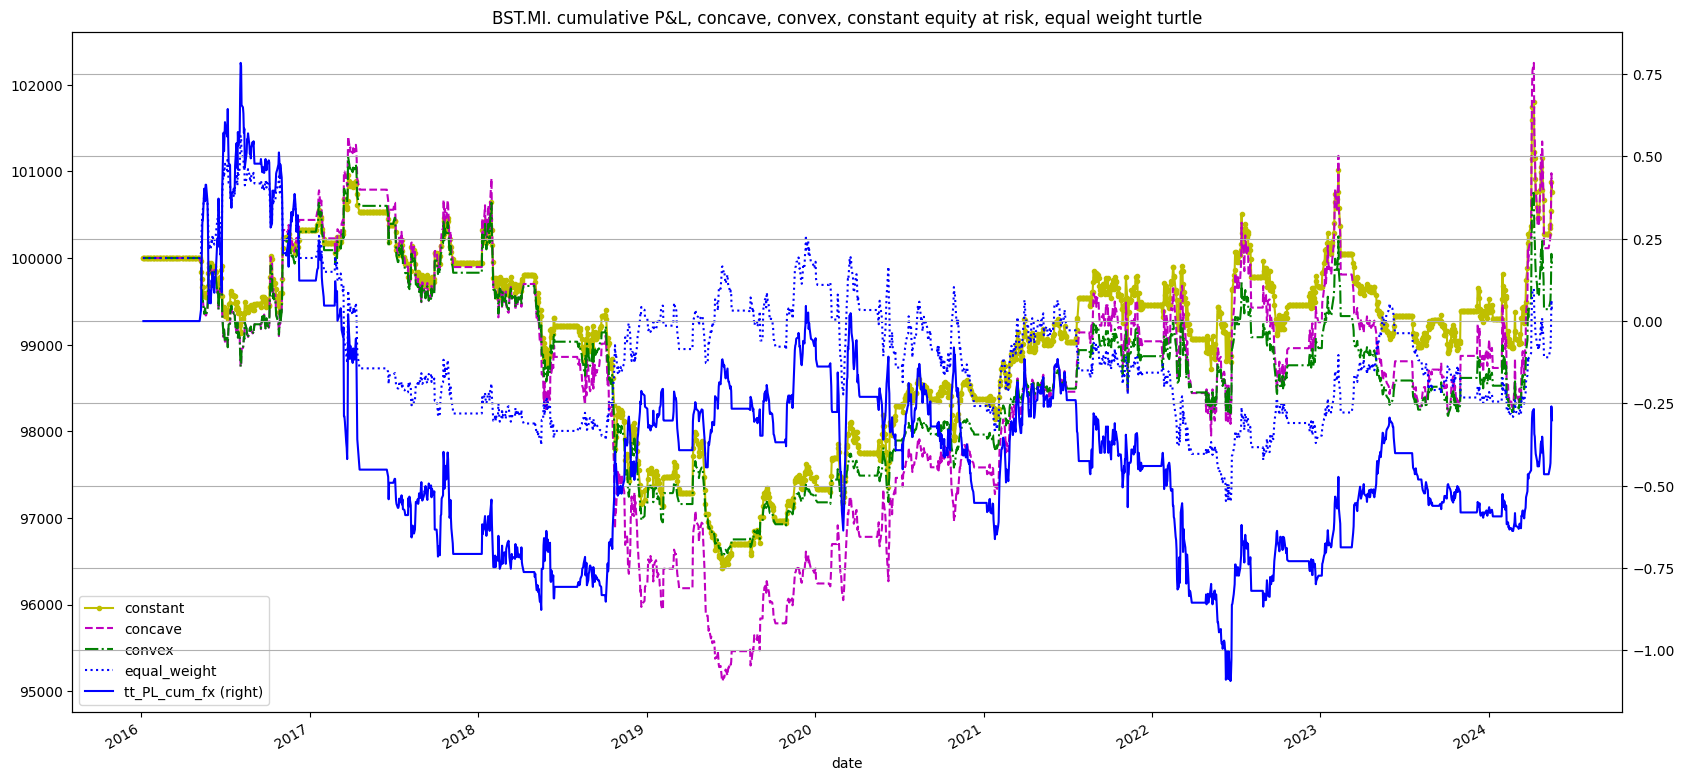

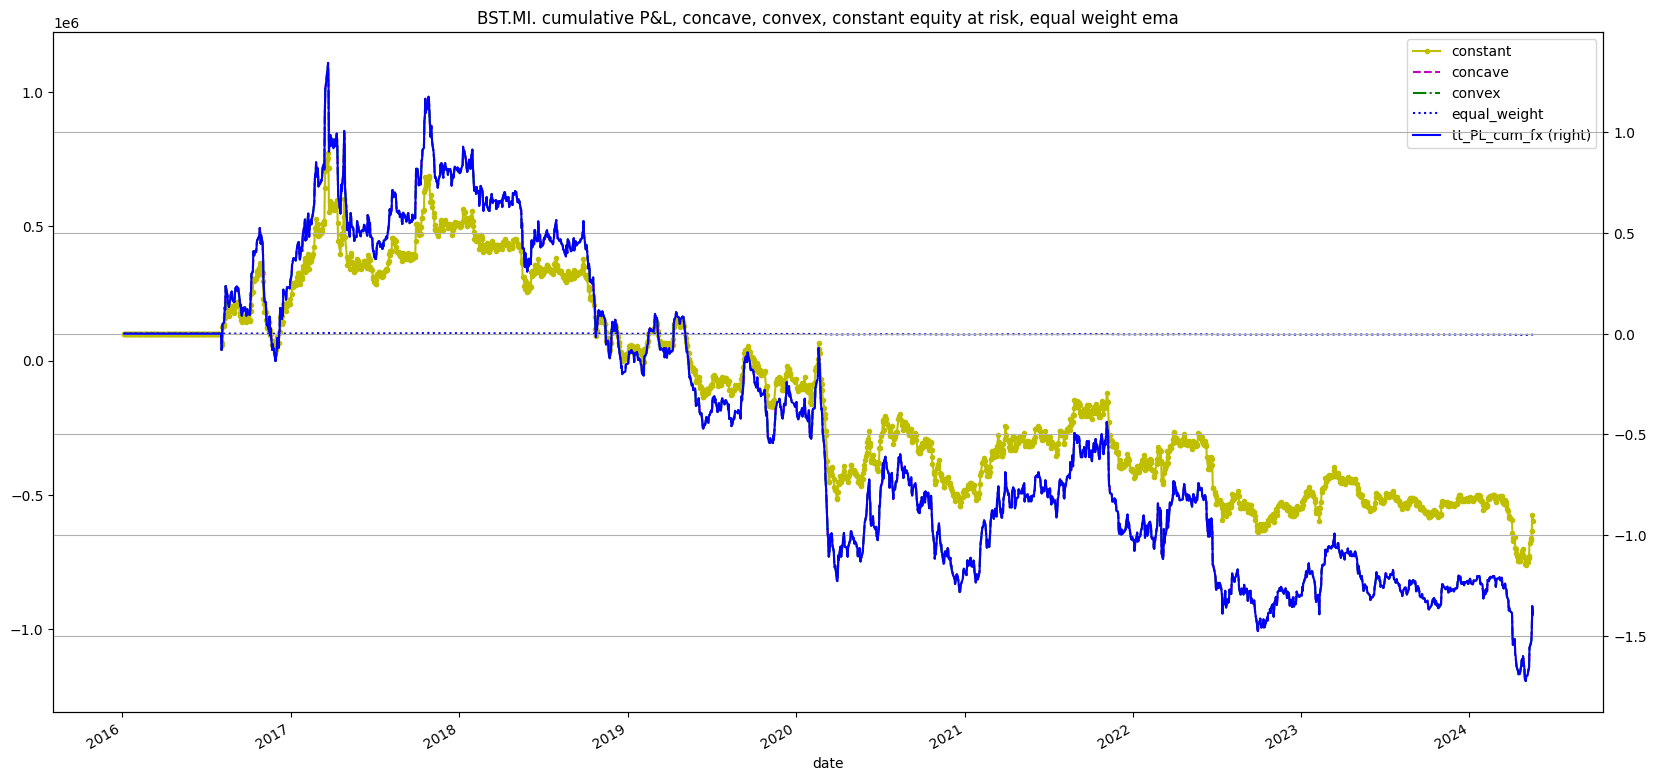

In [23]:
for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    # print(df.tail())
    plot_equity_amount(df, ticker, m)

In [24]:
# # determining the name of the file
# file_name = 'A2A_unt.xlsx'
 
# # saving the excel
# df.to_excel(file_name)

output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'shs_eql','shs_fxd','shs_ccv','shs_cvx']]
output_df_sel.groupby('method').last() 

shs_eql   shs_fxd   shs_ccv   shs_cvx
method                                                       
breakout                -2900.0   -1200.0   -1800.0   -1800.0
ema                     -2800.0  500000.0  750000.0  750000.0
floor_ceiling           -3100.0    5500.0    8300.0    8100.0
floor_ceiling_relative  -3100.0    1200.0     600.0     600.0
sma                     -2900.0  500000.0  750000.0  750000.0
turtle                  -2900.0    2900.0    4200.0    3100.0

In [25]:
df_fc.columns

Index(['date', 'volume', 'high', 'low', 'open', 'close', 'adj_close', 'ticker',
       'ropen', 'rhigh', 'rlow', 'rclose', 'hi1', 'lo1', 'hi2', 'lo2', 'hi3',
       'lo3', 'hi4', 'lo4', 'rg', 'flr', 'clg', 'rg_ch', 'rh1', 'rl1', 'rh2',
       'rl2', 'rh3', 'rl3', 'rh4', 'rl4', 'rrg', 'rflr', 'rclg', 'rrg_ch'],
      dtype='object')

In [26]:
df_fc[df_fc['clg'].notna()][['date', 'clg']].tail(1)

date   clg
1486 2021-11-05 08:00:00  2.42

In [27]:

df_fc[df_fc['flr'].notna()][['date', 'flr']].tail(1)

date   flr
1974 2023-10-04 07:00:00  1.06

In [28]:

df_fc[df_fc['hi3'].notna()][['date', 'hi3']].tail(1)

date   hi3
2130 2024-05-17 15:35:17  1.73

In [29]:
df_fc[df_fc['lo3'].notna()][['date', 'lo3']].tail(1)

date   lo3
2066 2024-02-14 08:00:00  1.17

In [30]:

price = 2.021
stop_loss = 1.61
qty = 1000
r_multiplier = 1.1
r_multiplier
pt = target_price(price, stop_loss, r_multiplier)
exit_qty = partial_exit(qty, r_multiplier)
print('target price', pt,'exit_quantity',exit_qty)

target price 2.4730999999999996 exit_quantity 909.090909090909


In [31]:
cost = 1.8945
price = cost * 1.08
qty * (cost - stop_loss) / (price - stop_loss)

652.4331514011832

In [32]:
average_true_range(df_fc,'high','low','close', n= 63)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2126    0.036984
2127    0.037143
2128    0.037937
2129    0.039524
2130    0.040317
Length: 2131, dtype: float64

In [33]:
df_fc.tail()

date   volume  high   low  open  close  adj_close  ticker  \
2126 2024-05-13 07:00:00   953076  1.56  1.48  1.54   1.53       1.53  BST.MI   
2127 2024-05-14 07:00:00   825105  1.55  1.50  1.53   1.54       1.54  BST.MI   
2128 2024-05-15 07:00:00   954654  1.62  1.54  1.54   1.59       1.59  BST.MI   
2129 2024-05-16 07:00:00  1421603  1.71  1.62  1.62   1.71       1.71  BST.MI   
2130 2024-05-17 15:35:17   783122  1.73  1.64  1.70   1.67       1.67  BST.MI   

      ropen  rhigh  ...  rh2  rl2   rh3  rl3  rh4  rl4  rrg  rflr  rclg  \
2126   0.92   0.93  ...  NaN  NaN   NaN  NaN  NaN  NaN  1.0   NaN   NaN   
2127   0.90   0.92  ...  NaN  NaN   NaN  NaN  NaN  NaN  1.0   NaN   NaN   
2128   0.90   0.95  ...  NaN  NaN   NaN  NaN  NaN  NaN  1.0   NaN   NaN   
2129   0.95   1.00  ...  NaN  NaN   NaN  NaN  NaN  NaN  1.0   NaN   NaN   
2130   0.99   1.01  ...  NaN  NaN  1.01  NaN  NaN  NaN -1.0   NaN   NaN   

      rrg_ch  
2126    0.88  
2127    0.88  
2128    0.88  
2129    0.88  
2130    1.01  

[5 rows x 36 columns]